In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import math

In [2]:
q=QuantumRegister(16)
c=ClassicalRegister(16)
qc=QuantumCircuit(q,c)

In [3]:
# rightmost eight (qu)bits have ')' = 00101001
qc.x(q[0])
qc.x(q[3])
qc.x(q[5]) 

In [4]:
# second eight (qu)bits have superposition of
# '8' = 00111000
# ';' = 00111011
# these differ only on the rightmost two bits
qc.h(q[9]) # create superposition on 9
qc.cx(q[9],q[8]) # spread it to 8 with a cnot
qc.x(q[11])
qc.x(q[12])
qc.x(q[13]) 

In [5]:
# measure
for j in range(16):
    qc.measure(q[j], c[j]) 

In [6]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(qc, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


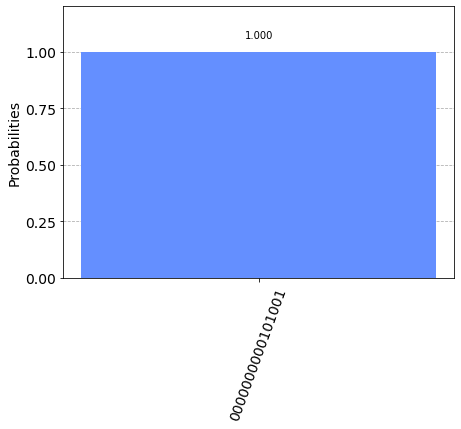

In [30]:
qc.measure(q,c)

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)
